In [5]:
import graphlab, pymysql
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn = pymysql.connect(host="127.0.0.1", user="root", password="passw0rd", db="hzcars")
sf = graphlab.SFrame.from_sql(conn=conn, sql_statement="select * from competition_result", dbapi_module=pymysql)

This non-commercial license of GraphLab Create for academic use is assigned to fangpengdong817@gmail.com and will expire on August 27, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Derek\AppData\Local\Temp\graphlab_server_1484272306.log.0


In [3]:
sf = sf.sort('month', ascending=True)

In [14]:
#sf['key'] = graphlab.SArray(range(1, len(sf)+1))
sf['key'] = sf.apply(lambda row:int("".join(row['month'].split("-"))))

In [16]:
sf2014 = sf[(sf['key']>=201401) & (sf['key']<=201412)]
sf2015 = sf[(sf['key']>=201501) & (sf['key']<=201512)]
sf2016 = sf[(sf['key']>=201601) & (sf['key']<=201612)]

sf2014['x'] = range(13-len(sf2014),13)
sf2015['x'] = range(13-len(sf2015),13)
sf2016['x'] = range(13-len(sf2016),13)

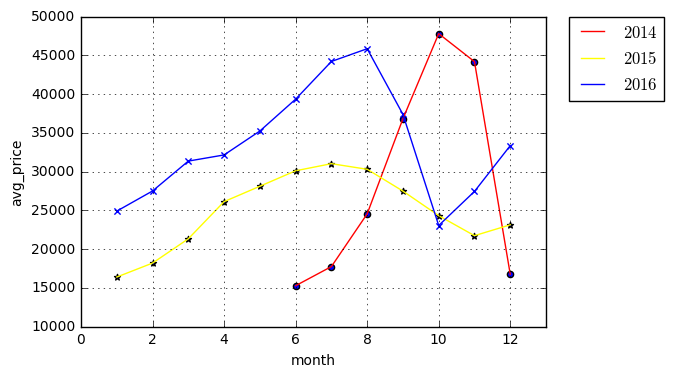

In [23]:
plt.figure(1)
plt.xlim([0, 13])
plt.xlabel("month")
plt.ylabel("avg_price")
plt.plot(sf2014['x'], sf2014['personal_avg_price'], color="red", label="$2014$")
plt.scatter(sf2014['x'], sf2014['personal_avg_price'] , marker='o')
plt.plot(sf2015['x'], sf2015['personal_avg_price'], color="yellow", label="$2015$")
plt.scatter(sf2015['x'], sf2015['personal_avg_price'] , marker='*')
plt.plot(sf2016['x'], sf2016['personal_avg_price'], color="blue", label="$2016$")
plt.scatter(sf2016['x'], sf2016['personal_avg_price'] , marker='x')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

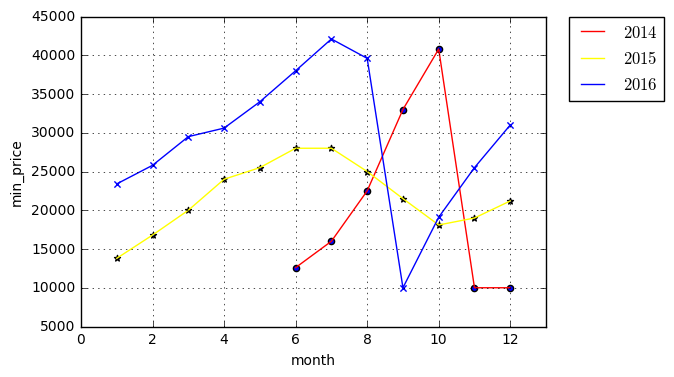

In [25]:
plt.figure(1)
plt.xlim([0, 13])
plt.xlabel("month")
plt.ylabel("min_price")
plt.plot(sf2014['x'], sf2014['personal_min_price'], color="red", label="$2014$")
plt.scatter(sf2014['x'], sf2014['personal_min_price'] , marker='o')
plt.plot(sf2015['x'], sf2015['personal_min_price'], color="yellow", label="$2015$")
plt.scatter(sf2015['x'], sf2015['personal_min_price'] , marker='*')
plt.plot(sf2016['x'], sf2016['personal_min_price'], color="blue", label="$2016$")
plt.scatter(sf2016['x'], sf2016['personal_min_price'] , marker='x')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()